This data given by an airline organization. The actual name of the company is not given due to various purposes that's why the name Invistico airlines. The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.

The objective is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.

Also the airlines need to know which features need more attention to generate more satisfied customers. 

The exercise is focused on implementing classification algorithm to perform the analysis. 

# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from fancyimpute import KNN
from functools import reduce
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

(CVXPY) Aug 12 03:38:34 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/Users/amrita/opt/anaconda3/lib/python3.7/site-packages/_scs_direct.cpython-37m-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /Users/amrita/opt/anaconda3/lib/python3.7/site-packages/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /Users/amrita/opt/anaconda3/lib/python3.7/site-packages/scs/.dylibs/libgomp.1.dylib')


In [2]:
# Import the dataset

df=pd.read_csv('/Users/amrita/Desktop/Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'satisfaction'.
# Satisfied takes a value 1 and not satisfied takes a value 0
# Satisfaction is our target variable

df['satisfaction']= label_encoder.fit_transform(df['satisfaction'])

In [4]:
# summary of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction,129880.0,0.547328,0.497757,0.0,0.0,1.0,1.0,1.0
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0


# Outliers

(129487, 23)

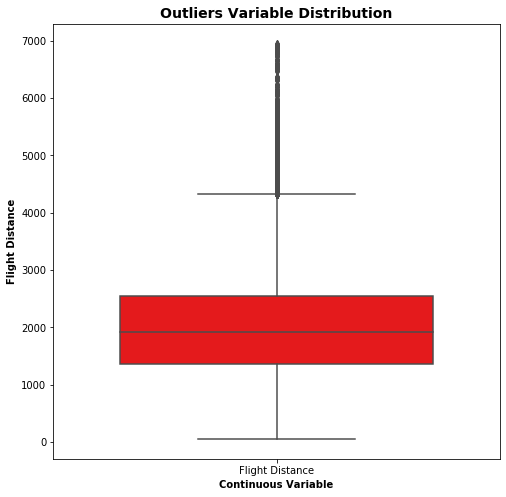

In [29]:
outliers = ['Flight Distance']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Flight Distance", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

(129487, 23)

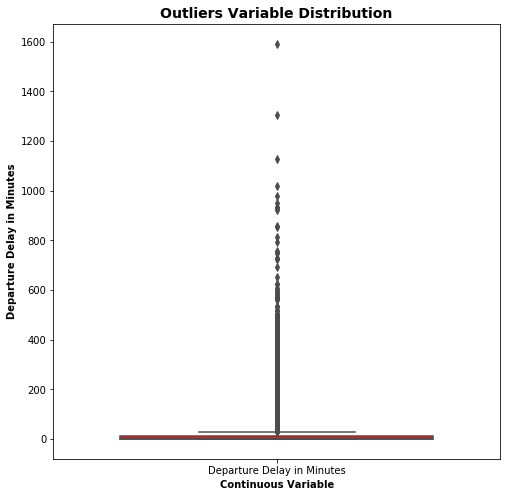

In [30]:
outliers = ['Departure Delay in Minutes']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Departure Delay in Minutes", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

(129487, 23)

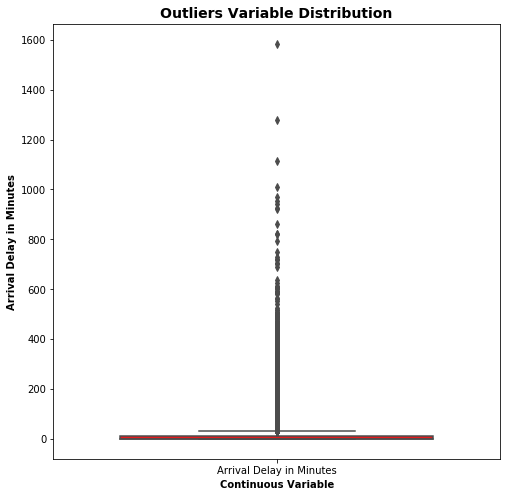

In [31]:
outliers = ['Arrival Delay in Minutes']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Arrival Delay in Minutes", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

 The outliers in the variables 'Arrival Delay in Minutes', 'Departure Delay in Minutes' and 'Flight Distance' contains important information about the airlines. Hence, I will not drop these outliers from the data. 

# Missing Values and Data types

In [5]:
df=df.replace(r'^\s*$', np.NaN, regex=True)

In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [7]:
check_df(df)

##################### Shape #####################
(129880, 23)
##################### Types #####################
satisfaction                           int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                     

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [9]:
missing_value_df

,column_name,percent_missing
satisfaction,satisfaction,0.000000
Gender,Gender,0.000000
Customer Type,Customer Type,0.000000
Age,Age,0.000000
Type of Travel,Type of Travel,0.000000
Class,Class,0.000000
Flight Distance,Flight Distance,0.000000
Seat comfort,Seat comfort,0.000000
Departure/Arrival time convenient,Departure/Arrival time convenient,0.000000
Food and drink,Food and drink,0.000000


In [10]:
# As mising values in 'Arrival Delay in Minutes' is approx only 3%, we can simply drop it.

df=df.dropna()

In [11]:
# no more missing values in the dataset

df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

# Check for Class Imbalance in the Target column

In [12]:
# check class balance
# Almost class balanced

df['satisfaction'].value_counts()

1    70882
0    58605
Name: satisfaction, dtype: int64

/Users/amrita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x101649dd0>,
      dtype=object)

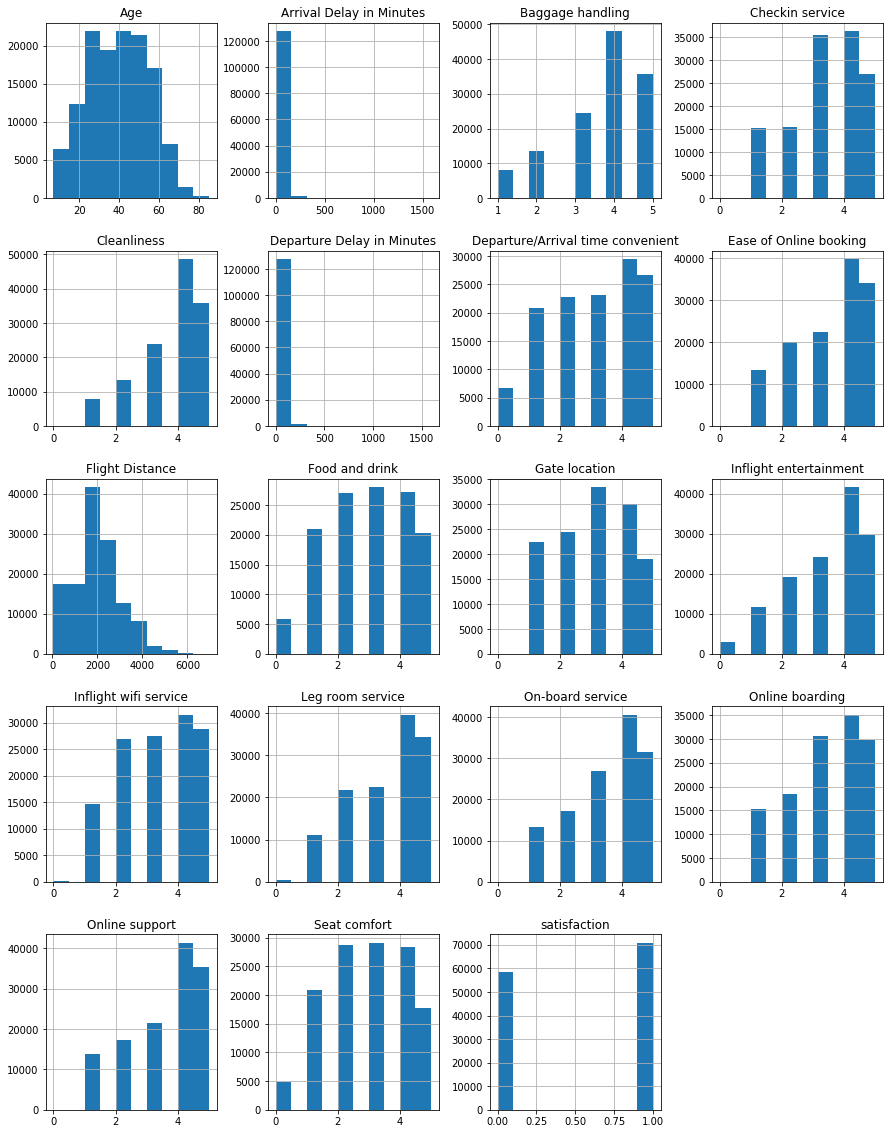

In [13]:
# Looking at the distribution of the data using historams


fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [14]:
# check unique values of each feature
df.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5397
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            464
Arrival Delay in Minutes              472
dtype: int64

In [16]:
df['Class'].value_counts()

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64

In [17]:
df['Customer Type'].value_counts()

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64

In [18]:
df['Type of Travel'].value_counts()

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64

In [19]:
# Both male and female count is quite similar
df['Gender'].value_counts()

Female    65703
Male      63784
Name: Gender, dtype: int64

# Create dummies for the categorical variables

In [20]:
# Create dummies for Class, Customer Type and Type of Travel
one_hot1 = pd.get_dummies(df['Class'], drop_first=True)
one_hot2 = pd.get_dummies(df['Customer Type'], drop_first=True)
one_hot3 = pd.get_dummies(df['Type of Travel'], drop_first=True)
one_hot4 = pd.get_dummies(df['Gender'], drop_first=True)
bins1=pd.concat([one_hot1, one_hot2,one_hot3,one_hot4], axis=1)


dummies_data=pd.concat([df, bins1], axis=1)
dummies_data= dummies_data.drop (['Class','Customer Type','Type of Travel'], axis=1)

In [26]:
dummies_data = dummies_data.drop(['Gender'], axis=1)

In [28]:
dummies_data

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Eco,Eco Plus,disloyal Customer,Personal Travel,Male
0,1,65,265,0,0,0,2,2,4,2,...,5,3,2,0,0.0,1,0,0,1,0
1,1,47,2464,0,0,0,3,0,2,2,...,2,3,2,310,305.0,0,0,0,1,1
2,1,15,2138,0,0,0,3,2,0,2,...,4,4,2,0,0.0,1,0,0,1,0
3,1,60,623,0,0,0,3,3,4,3,...,4,1,3,0,0.0,1,0,0,1,0
4,1,70,354,0,0,0,3,4,3,4,...,4,2,5,0,0.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,1731,5,5,5,3,2,5,2,...,4,4,2,0,0.0,1,0,1,1,0
129876,0,63,2087,2,3,2,4,2,1,1,...,1,2,1,174,172.0,0,0,1,1,1
129877,0,69,2320,3,0,3,3,3,2,2,...,2,3,2,155,163.0,1,0,1,1,1
129878,0,66,2450,3,2,3,2,3,2,2,...,2,1,2,193,205.0,1,0,1,1,1
